# Calculating the Ellipticity-Ellipticity Galaxy-Mass Correlation Functions

### Spencer Everett, SLAC, 7/16/2015

First import all of the necessary files:

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import scipy as sp
import os,sys
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
import cmath
import treecorr
%matplotlib inline

In [5]:
# Pangloss:
PANGLOSS_DIR = os.path.expandvars("$PANGLOSS_DIR")
sys.path.append(PANGLOSS_DIR)
import pangloss

In [6]:
K = pangloss.Kappamap(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.kappa',FITS=False)

In [7]:
S = pangloss.Shearmap([PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1',PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'],FITS=False)

In [8]:
config = pangloss.Configuration(PANGLOSS_DIR+'/example/example.config')
F = pangloss.ForegroundCatalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_0_0_N_4096_ang_4_Guo_galaxies_on_plane_27_to_63.images.txt',config)

In [9]:
B = pangloss.BackgroundCatalog(sigma_e=0.2,domain=[2,1.5,-2,-1.5])
B.lens_by_map(K,S)

## First try

For now, using a test `config_file` given by the author of TreeCorr

In [57]:
from astropy.io import fits
shear = fits.open(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1.fits')
shear[0].data.shape

(4096, 4096)

In [31]:
sample_config_file = PANGLOSS_DIR+'/example/sample.params.auto.shear'

In [32]:
cat = treecorr.Catalog(PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1.fits', sample_config_file)
gg = treecorr.GGCorrelation(sample_config_file)
gg.process(cat)
gg.write(out_file_name)

AttributeError: 'str' object has no attribute 'get'

In [34]:
config = treecorr.read_config(sample_config_file)
#config['file_name'] = PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1'
#config['file_name2'] = PANGLOSS_DIR+'/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_2'
#config['gg_file_name'] = 'gg.out'
treecorr.corr2(config)

Using 8 threads.
INFO:treecorr:Using 8 threads.
Reading input file /home/spencer/Documents/Pangloss/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1
INFO:treecorr:Reading input file /home/spencer/Documents/Pangloss/data/GGL_los_8_0_0_N_4096_ang_4_rays_to_plane_37_f.gamma_1


IOError: Header missing END card.

## Trying a different part of the module:

In [12]:
d=[1.9,-1.9,-1.9,1.9]
#d = [1.9,1.8,-1.9,-1.8]
B = pangloss.BackgroundCatalog(sigma_e=0.2,domain=d)
B.lens_by_map(K,S)
print B.galaxy_count

519840


In [441]:
# Need this to remove galaxies not contained in the K/S maps:
#galaxies = [B.galaxies[i] for i in range(B.galaxy_count) if not np.isnan(B.galaxies[i]).any()]
#print np.shape(galaxies)

### Ellipticities:

In [14]:
galaxies = B.galaxies

ra = np.rad2deg(galaxies['RA'])
dec = np.rad2deg(galaxies['Dec'])
g1 = galaxies['e1']
g2 = galaxies['e2']
k = galaxies['kappa']
w = np.ones(np.size(ra))
binsize = .01
print np.shape(g1)
print np.shape(w)

(519840,)
(519840,)


In [486]:
binsize=0.01
min_sep = 0.01
max_sep = 1

In [487]:
treecorr.version

'3.1.1'

In [488]:
cat_lens = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1'], g2=galaxies['e2'], ra_units='deg', dec_units='deg')

In [489]:
gg1 = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)

In [490]:
gg1.process(cat_lens)

0.0405274756883
False
False


'\nt = [j for j in range(np.size(g1)) if np.isnan(g1[j]) == True]\nprint len(t)\nprint len(g1)\nprint ra[t[100]]\nprint K.at(ra[t[100]],dec[t[100]])\nprint S.at(ra[t[100]],dec[t[100]])\nprint g1[t[100]]\n'

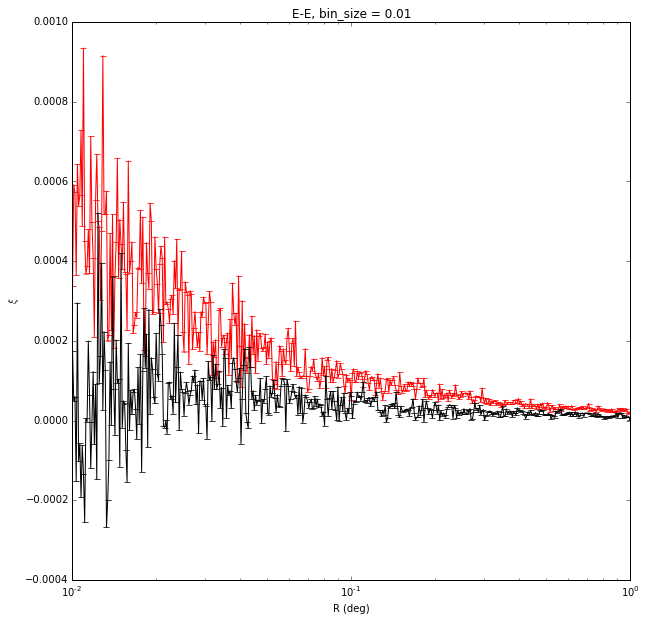

In [491]:
# Small binsize, 0.01 to 1 deg
plt.errorbar(np.exp(gg1.logr), gg1.xip, gg1.varxi, c='r')
plt.errorbar(np.exp(gg1.logr), gg1.xim, gg1.varxi, c='k')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('E-E, bin_size = '+str(binsize))
print cat_lens.varg
print np.isnan(g1).any()
print np.isnan(g2).any()
'''
t = [j for j in range(np.size(g1)) if np.isnan(g1[j]) == True]
print len(t)
print len(g1)
print ra[t[100]]
print K.at(ra[t[100]],dec[t[100]])
print S.at(ra[t[100]],dec[t[100]])
print g1[t[100]]
'''

In [492]:
binsize = 0.1
min_sep = 0.01
max_sep = 1
gg2 = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg2.process(cat_lens)

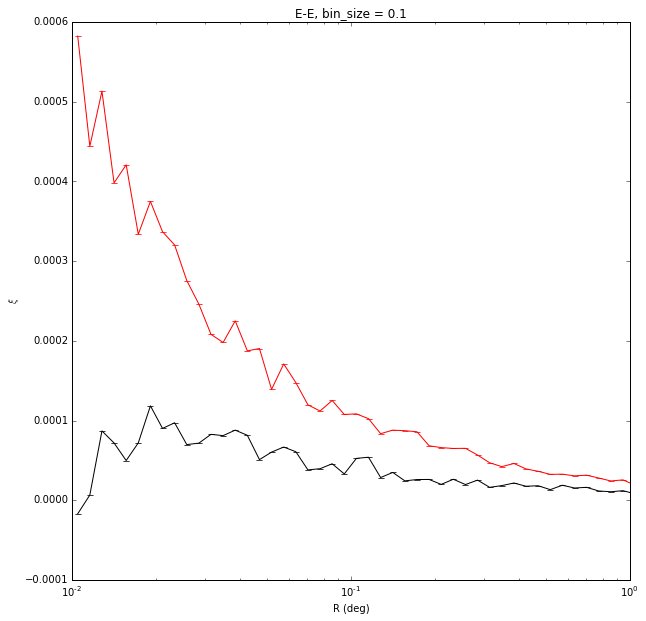

In [493]:
# Big binsize, 0.01 to 1 deg
plt.errorbar(np.exp(gg2.logr), gg2.xip, gg2.varxi, c='r')
plt.errorbar(np.exp(gg2.logr), gg2.xim, gg2.varxi, c='k')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('E-E, bin_size = '+str(binsize))

In [451]:
g3 = galaxies['e1_int']
g4 = galaxies['e2_int']

In [494]:
binsize=0.1
min_sep = 0.01
max_sep = 0.1
cat_int = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1_int'], g2=galaxies['e2_int'], ra_units='deg', dec_units='deg')
gg_int = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg_int.process(cat_int)

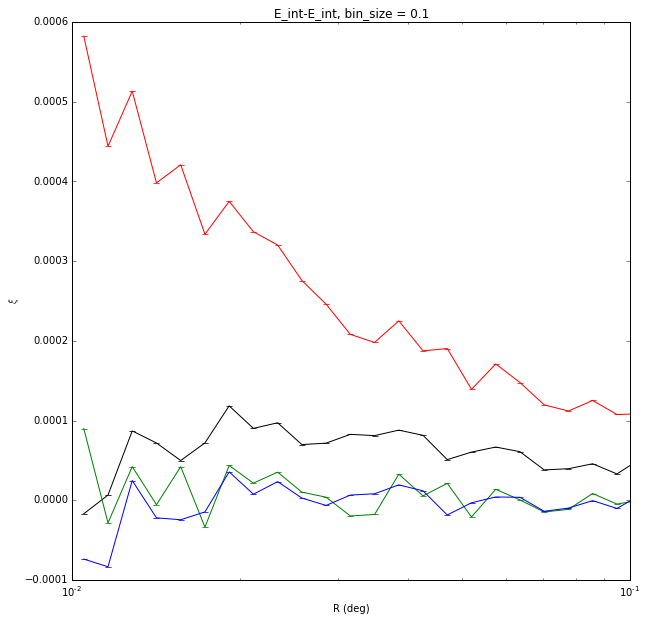

In [495]:
# Big binsize, 0.01 to 0.1 deg
plt.errorbar(np.exp(gg2.logr), gg2.xip, gg2.varxi, c='r')
plt.errorbar(np.exp(gg2.logr), gg2.xim, gg2.varxi, c='k')
plt.errorbar(np.exp(gg_int.logr), gg_int.xip, gg_int.varxi, c='g')
plt.errorbar(np.exp(gg_int.logr), gg_int.xim, gg_int.varxi, c='b')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('E_int-E_int, bin_size = '+str(binsize))

In [454]:
binsize=0.01
min_sep = 0.01
max_sep = 0.1
cat_int = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1_int'], g2=galaxies['e2_int'], ra_units='deg', dec_units='deg')
gg_int = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg_int.process(cat_int)
cat = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1'], g2=galaxies['e2'], ra_units='deg', dec_units='deg')
gg2 = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg2.process(cat)

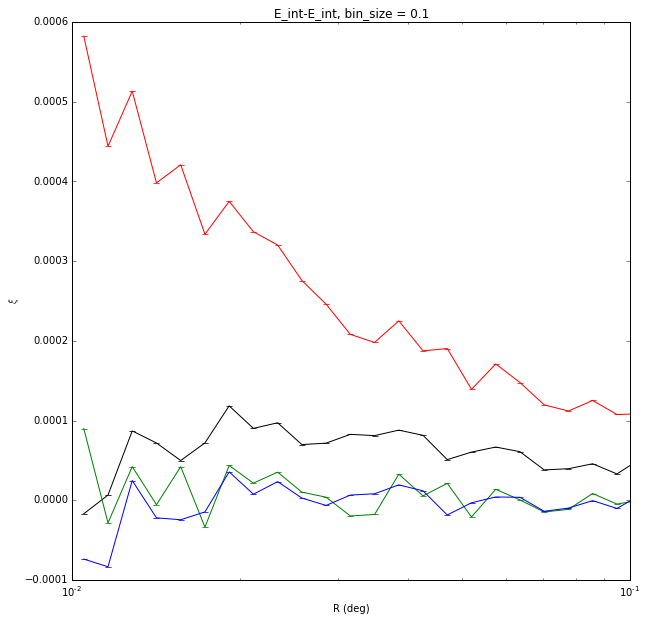

In [496]:
# Small binsize, 0.01 to 0.1 deg
plt.errorbar(np.exp(gg2.logr), gg2.xip, gg2.varxi, c='r')
plt.errorbar(np.exp(gg2.logr), gg2.xim, gg2.varxi, c='k')
plt.errorbar(np.exp(gg_int.logr), gg_int.xip, gg_int.varxi, c='g')
plt.errorbar(np.exp(gg_int.logr), gg_int.xim, gg_int.varxi, c='b')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('E_int-E_int, bin_size = '+str(binsize))

In [497]:
binsize=0.1
min_sep = 0.01
max_sep = 0.1
cat_int = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1_int'], g2=galaxies['e2_int'], ra_units='deg', dec_units='deg')
gg_int = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg_int.process(cat_int)
cat = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1'], g2=galaxies['e2'], ra_units='deg', dec_units='deg')
gg2 = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg2.process(cat)

[  2.53222765e-09   2.07208864e-09   1.69744639e-09   1.39286983e-09
   1.14148684e-09   9.34229990e-10   7.65731778e-10   6.26775426e-10
   5.14115704e-10   4.21458132e-10   3.44844471e-10   2.82865392e-10
   2.31868017e-10   1.90013167e-10   1.55687140e-10   1.27759989e-10
   1.04700625e-10   8.58823209e-11   7.04938303e-11   5.78348084e-11
   4.74726150e-11   3.89775070e-11   3.20011216e-11   2.62925270e-11]


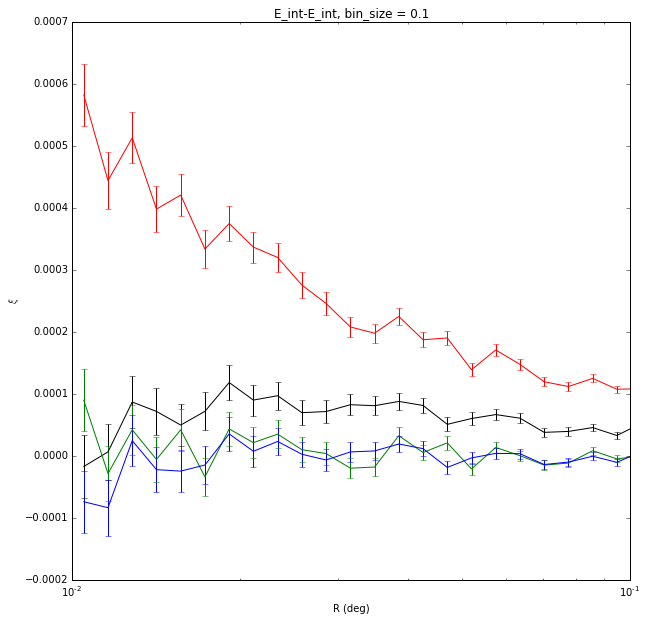

In [498]:
# Big binsize, 0.01 to 0.1 deg
plt.errorbar(np.exp(gg2.logr), gg2.xip, np.sqrt(gg2.varxi), c='r')
plt.errorbar(np.exp(gg2.logr), gg2.xim, np.sqrt(gg2.varxi), c='k')
plt.errorbar(np.exp(gg_int.logr), gg_int.xip, np.sqrt(gg_int.varxi), c='g')
plt.errorbar(np.exp(gg_int.logr), gg_int.xim, np.sqrt(gg_int.varxi), c='b')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('E_int-E_int, bin_size = '+str(binsize))
print gg2.varxi

In [501]:
min_sep = 0.01
max_sep = 0.1
N = 30
binsize = np.log10(max_sep/min_sep)/N
cat_int = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1_int'], g2=galaxies['e2_int'], ra_units='deg', dec_units='deg')
gg_int = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg_int.process(cat_int)
cat = treecorr.Catalog(ra=ra, dec=dec, g1=g1, g2=g2, ra_units='deg', dec_units='deg')
gg2 = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg2.process(cat)

/home/spencer/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt
/home/spencer/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


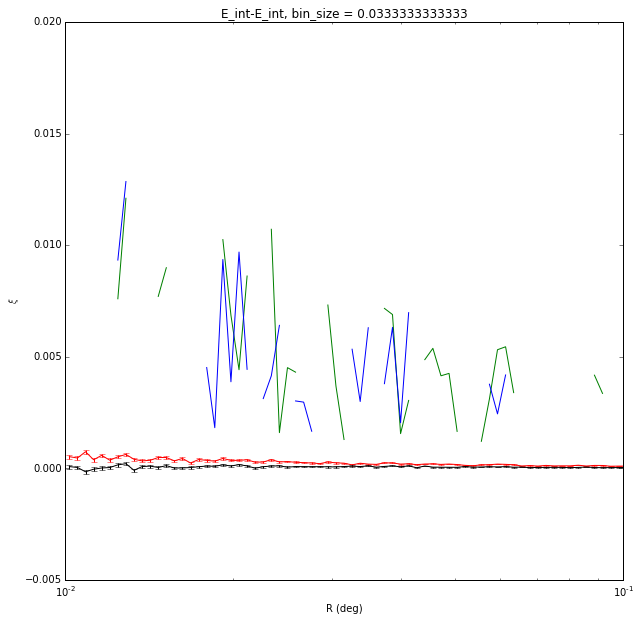

In [502]:
# Using mrbecker binsize
plt.errorbar(np.exp(gg2.logr), gg2.xip, np.sqrt(gg2.varxi), c='r')
plt.errorbar(np.exp(gg2.logr), gg2.xim, np.sqrt(gg2.varxi), c='k')
plt.errorbar(np.exp(gg_int.logr), np.sqrt(gg_int.xip, gg_int.varxi), c='g')
plt.errorbar(np.exp(gg_int.logr), np.sqrt(gg_int.xim, gg_int.varxi), c='b')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('E_int-E_int, bin_size = '+str(binsize))

In [15]:
# Imag/cross test
min_sep = 0.01
max_sep = 0.1
N = 30
binsize = np.log10(max_sep/min_sep)/N
cat = treecorr.Catalog(ra=ra, dec=dec, g1=g3, g2=g4, ra_units='deg', dec_units='deg')
gg3 = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg3.process(cat)
cat = treecorr.Catalog(ra=ra, dec=dec, g1=g1, g2=g2, ra_units='deg', dec_units='deg')
gg2 = treecorr.GGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
gg2.process(cat)

NameError: name 'g3' is not defined

In [11]:
plt.errorbar(np.exp(gg2.logr), 0.5*(gg2.xim_im-gg2.xip_im), c='r')
plt.errorbar(np.exp(gg2.logr) ,0.5*(gg3.xim_im-gg3.xip_im), c='k')
#plt.errorbar(np.exp(gg3.logr), gg3.xip_im, np.sqrt(gg3.varxi), c='g')
#plt.errorbar(np.exp(gg3.logr), gg3.xim_im, np.sqrt(gg3.varxi), c='b')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('E_int-E_int, bin_size = '+str(binsize))

NameError: name 'gg2' is not defined

### Galaxy-Mass:

In [437]:
B = pangloss.BackgroundCatalog(sigma_e=0.2,domain=[1.9,-1.9,-1.9,1.9])
B.lens_by_map(K,S)
print B.galaxy_count

576000


In [438]:
galaxies = B.galaxies

In [472]:
ra = np.rad2deg(galaxies['RA'])
dec = np.rad2deg(galaxies['Dec'])

In [506]:
min_sep = 0.01
max_sep = 1.0
N = 10
binsize = np.log10(max_sep/min_sep)/N

In [509]:
cat1 = treecorr.Catalog(ra=ra, dec=dec, ra_units='deg', dec_units='deg')
cat2 = treecorr.Catalog(ra=ra, dec=dec, g1=galaxies['e1_int'], g2=galaxies['e2_int'], ra_units='deg', dec_units='deg')
ng = treecorr.NGCorrelation(bin_size=binsize, min_sep=min_sep, max_sep=max_sep, sep_units='deg', bin_slop=0.05/binsize)
ng.process(cat1,cat2)

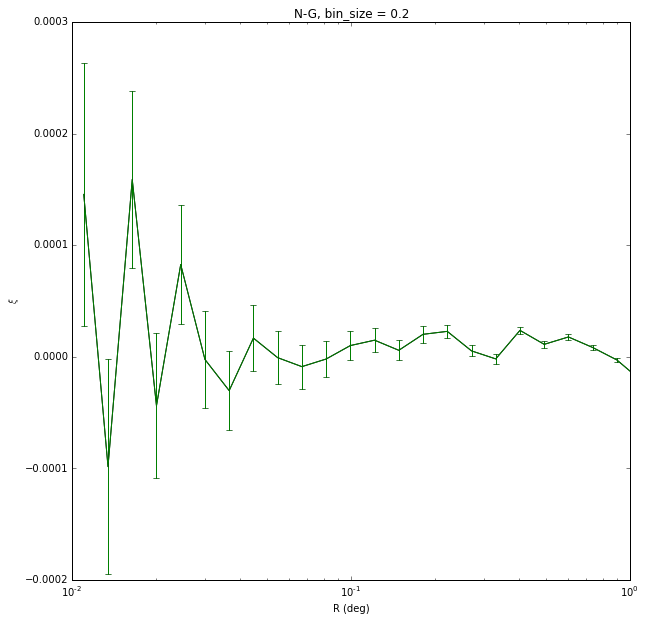

In [510]:
plt.errorbar(np.exp(ng.logr), ng.xi, np.sqrt(ng.varxi), c='k')
plt.errorbar(np.exp(ng.logr), ng.xi, np.sqrt(ng.varxi), c='g')
plt.xscale('log')
plt.ylabel(r'$\xi$')
plt.xlabel('R (deg)')
plt.gcf().set_size_inches(10,10)
plt.gca().set_xlim(min_sep,max_sep)
plt.title('N-G, bin_size = '+str(binsize))